## Run a downloaded Keras model
Here is a note on using an exported keras model in a notebook. It's not especially helpful yet for models exported from the platform, but perhaps it's of use to you anyway.

In [1]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
from matplotlib.pyplot import imshow

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


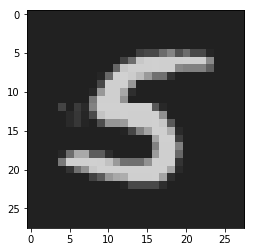

In [2]:
# Load model from disk. Replace /YOUR_PATH/model.h5
model_path = 'mnist-rgb-cnn.h5'
model = load_model(model_path, compile=False)

# Load example image from disk
img_path='img_5363.png'
img = np.array(Image.open(img_path))

%matplotlib inline
showme = Image.open(img_path, 'r')
imshow(np.asarray(showme))

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
uda161136-64ce-4e01-92a5-681 (None, 28, 28, 3)         0         
_________________________________________________________________
ud2551994-4493-4bc4-bd02-3d8 (None, 28, 28, 64)        1792      
_________________________________________________________________
uea94485f-9768-4555-96c3-174 (None, 14, 14, 64)        0         
_________________________________________________________________
u66f5b13e-c031-4231-9031-baf (None, 14, 14, 64)        256       
_________________________________________________________________
u823271db-97c4-489f-9c2e-393 (None, 14, 14, 128)       73856     
_________________________________________________________________
u5f8e8238-4b62-4b88-9324-1fc (None, 128)               0         
_________________________________________________________________
uae7cfbe0-9176-447b-a544-d89 (None, 128)               512       
__________

In [4]:
# Use BGR channel ordering. This is not to be done if using cv2 to load the image.
img = img[:, :, ::-1]
# Normalize image
img = img / 255
# Add outer shape 1, for batch size
img = img.reshape((1,img.shape[0],img.shape[1],img.shape[2]))

In [5]:
# Run model
model.predict(img)

array([[6.0543658e-05, 5.6469318e-04, 2.0139185e-01, 1.2853633e-04,
        8.9068337e-08, 7.9409611e-01, 1.3357296e-03, 3.9497405e-07,
        1.9779061e-03, 4.4424669e-04]], dtype=float32)

So here you see the "result" although without a way to map back to the original labels, it is not too useful yet.
There is a html/js implementtion you can quickly look at if you'd like:

https://storage.googleapis.com/bucket-8732/demo/image-classifier/classifier.html

`URL: https://a.peltarion.com/deployment/7ebd6366-16fb-48be-9426-bc03514621b7/forward`

`Token: 05b3f82e-080b-4194-b0c9-b0732ec92cbc`

Remember to add "Image" and "Width 28" "Height 28" to match the model inputs above